In [11]:
from sys import path as syspath
from pathlib import Path
import numpy as np

syspath.append(str(Path().home() / "pyref" / "src"))

import pyref as rf
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
import matplotlib as mpl
import matplotlib.gridspec as gridspec

plt.style.use('default')
plt.style.use("science")

sns.set_context("paper", font_scale=1.5)

db = rf.db()

In [12]:
znpc_ocs = db.get_oc("C32H16N8Zn")

en_range = np.linspace(274.9, 295, 1000)

delta_xx = znpc_ocs["xx"].delta(en_range)
delta_zz = znpc_ocs["zz"].delta(en_range)
delta_iso = znpc_ocs["iso"].delta(en_range)

beta_xx = znpc_ocs["xx"].beta(en_range)
beta_zz = znpc_ocs["zz"].beta(en_range)
beta_iso = znpc_ocs["iso"].beta(en_range)

fig = plt.figure(figsize=(12, 12))

<Figure size 1200x1200 with 0 Axes>

In [99]:
znpc_mono = {
    "250": {
        "s": db.get_refl("zrt_250.0_100.csv", "ZnPc"),
        "p": db.get_refl("zrt_250.0_190.csv", "ZnPc"),
        },
    "275": {
        "s": db.get_refl("275.0_100.0_refl.parquet.gzip", "ZnPc"),
        "p": db.get_refl("275.0_190.0_refl.parquet.gzip", "ZnPc"),
        },
    "280": {
        "s": db.get_refl("280.0_100.0_refl.parquet.gzip", "ZnPc"),
        "p": db.get_refl("280.0_190.0_refl.parquet.gzip", "ZnPc"),
        },
    "281": {
        "s": db.get_refl("281.0_100.0_refl.parquet.gzip", "ZnPc"),
        "p": db.get_refl("281.0_190.0_refl.parquet.gzip", "ZnPc"),
        },
    "282": {
        "s": db.get_refl("282.0_100.0_refl.parquet.gzip", "ZnPc"),
        "p": db.get_refl("282.0_190.0_refl.parquet.gzip", "ZnPc"),
        },
    "282.3": {
        "s": db.get_refl("282.3_100.0_refl.parquet.gzip", "ZnPc"),
        "p": db.get_refl("282.3_190.0_refl.parquet.gzip", "ZnPc"),
        },
    "282.7": {
        "s": db.get_refl("282.7_100.0_refl.parquet.gzip", "ZnPc"),
        "p": db.get_refl("282.7_190.0_refl.parquet.gzip", "ZnPc"),
        },
    "283.1": {
        "s": db.get_refl("283.1_100.0_refl.parquet.gzip", "ZnPc"),
        "p": db.get_refl("283.1_190.0_refl.parquet.gzip", "ZnPc"),
        },
    "283.7": {
        "s": db.get_refl("ZnPc_283.7_100.0 (CCD Scan 82865).parquet", "ZnPc"),
        "p": db.get_refl("ZnPc_283.7_190.0 (CCD Scan 82869).parquet", "ZnPc"),
    },
    "284.1": {
        "s": db.get_refl("ZnPc_284.0_100.0 (CCD Scan 82865).parquet", "ZnPc"),
        "p": db.get_refl("ZnPc_284.0_190.0 (CCD Scan 82869).parquet", "ZnPc"),
        },
}

C:\Users\Harlan Heilman\AppData\Local\Temp\ipykernel_18924\4040072344.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s["Refl"] = 1/10**i * s["Refl"].copy()
C:\Users\Harlan Heilman\AppData\Local\Temp\ipykernel_18924\4040072344.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s["Refl"] = 1/10**i * s["Refl"].copy()
C:\Users\Harlan Heilman\AppData\Local\Temp\ipykernel_18924\4040072344.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Text(-0.165, 1, '(a)')

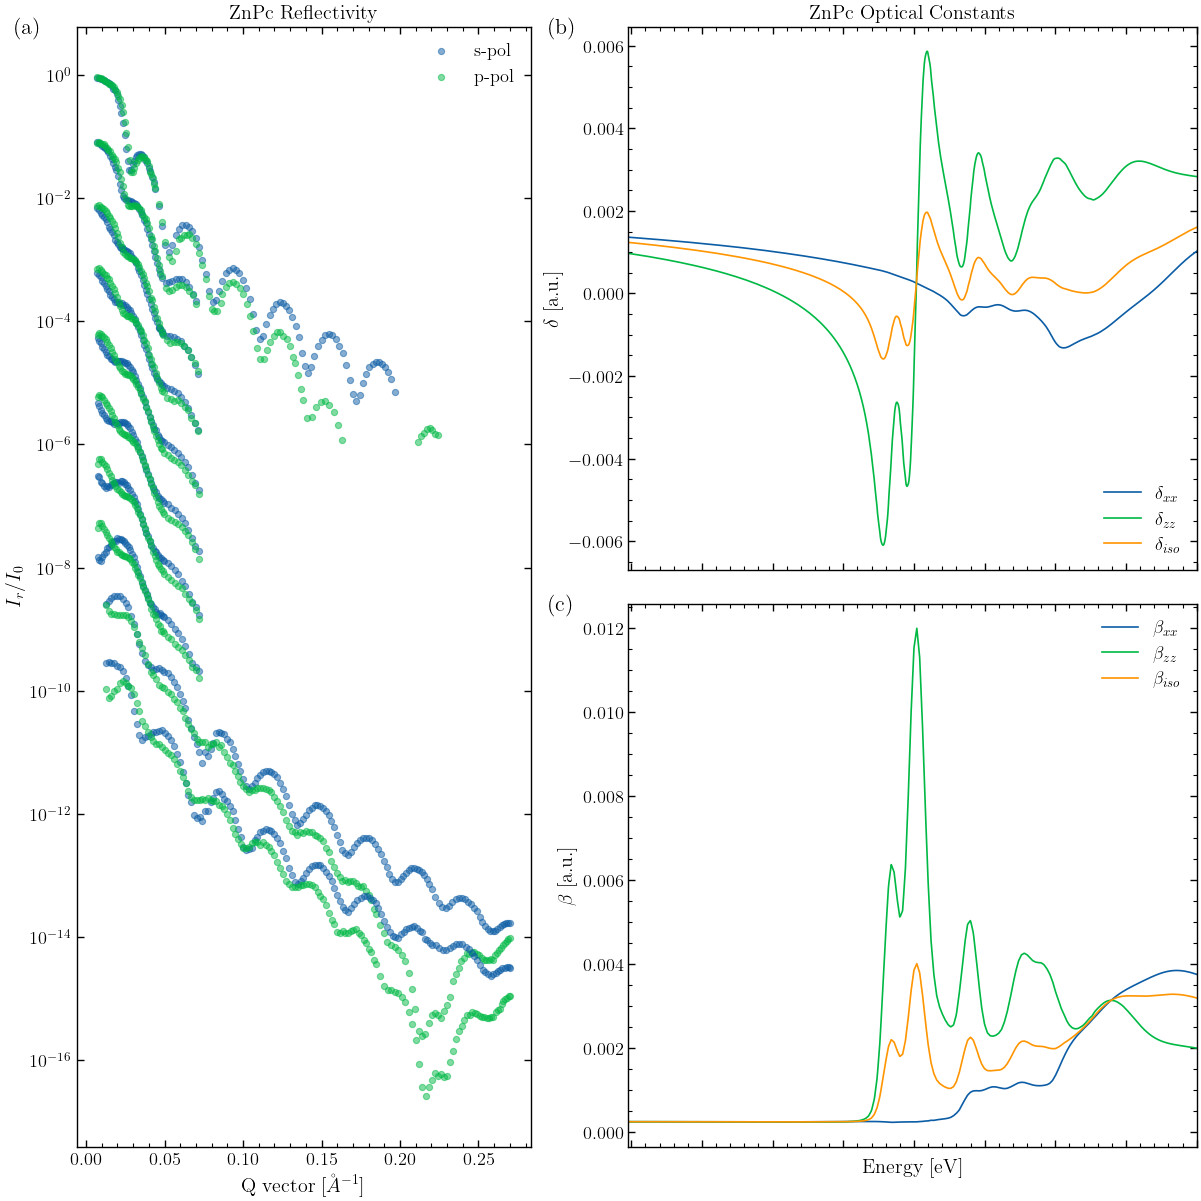

In [100]:
energies = [250, 275, 280, 281, 282, 282.3, 282.7, 283.1, 283.7, 284.1]
import matplotlib.transforms as mtransforms

fig, ax = plt.subplot_mosaic(
    [["refl", "delta"],
     ["refl", "beta"]],
     layout = "constrained",
     width_ratios = [1, 1.25],
     figsize = (12, 12),
)

trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)

ax["delta"].plot(en_range, delta_xx, label = r"$\delta_{xx}$")
ax["delta"].plot(en_range, delta_zz, label = r"$\delta_{zz}$")
ax["delta"].plot(en_range, delta_iso, label = r"$\delta_{iso}$")

ax["beta"].plot(en_range, beta_xx, label = r"$\beta_{xx}$")
ax["beta"].plot(en_range, beta_zz, label = r"$\beta_{zz}$")
ax["beta"].plot(en_range, beta_iso, label = r"$\beta_{iso}$")

ax["delta"].set(
    ylabel = r"$\delta$ [a.u.]",
    title = "ZnPc Optical Constants",
    xlim = (274.9, 295),
)
_ = [ax[i].tick_params(labelbottom = False) for i in ["delta", "beta"]]
ax["delta"].legend(loc = "lower right")
ax["delta"].text(-.165, 1, "(b)", transform = ax["delta"].transAxes+trans, fontsize = 16)

ax["beta"].set(
    ylabel = r"$\beta$ [a.u.]",
    xlabel = r"Energy [eV]",
    xlim = (274.9, 295),
)
ax["beta"].sharex(ax["delta"])
ax["beta"].legend()
ax["beta"].text(-.165, 1, "(c)", transform = ax["beta"].transAxes+trans, fontsize = 16)

for i, en in enumerate(energies):
    s = znpc_mono[f"{en}"]["s"].iloc[6:]
    p = znpc_mono[f"{en}"]["p"].iloc[6:]
    if en == 250:
        # in p where Refl < 1e-6
        p = p[p["Refl"] > 1e-6]
    # scale data frames to have a 1 order of magnitude offset
    s["Refl"] = 1/10**i * s["Refl"].copy()
    p["Refl"] = 1/10**i * p["Refl"].copy()

    s.plot(x = "Q", y = "Refl", ax = ax["refl"], kind = 'scatter', color = "C0", alpha = 0.5)
    p.plot(x = "Q", y = "Refl", ax = ax["refl"], kind = 'scatter', color = "C1", alpha = 0.5)


ax["refl"].set(
    ylabel = r"$I_r / I_0$",
    xlabel = r"Q vector [$\AA^{-1}$]",
    title = r"ZnPc Reflectivity",
    yscale = "log"
)
ax["refl"].legend(labels = ["s-pol", "p-pol"])
ax["refl"].text(-.165, 1, "(a)", transform = ax["refl"].transAxes+trans, fontsize = 16)